In [59]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import pylab as pp
import os
import csv
from scipy.interpolate import griddata
from matplotlib import cm

In [2]:
x = []
y = []
z = []

In [4]:
os.chdir('D:/Engineering/PEMFC/Rhombic/A/0.4')
fname = "A.csv"

In [5]:
with open(fname, 'r') as file:
    data = csv.reader(file, delimiter=',')
    for row in data:
        x.append(row[1])
        y.append(row[2])
        z.append(row[4])

for i in range(len(x)):
    x[i] = float(x[i])
    y[i] = float(y[i])
    z[i] = float(z[i])

In [37]:
data[:] = [x[:], y[:]]

In [31]:
xx = np.linspace(min(x), max(x), len(x))
yy = np.linspace(min(y), max(y), len(y))
X, Y = np.meshgrid(xx, yy)

In [41]:
for i in range(len(x)):
    data.append([x[i], y[i]])

In [131]:
P = griddata(data, z, (X, Y), method='nearest')

<IPython.core.display.Javascript object>


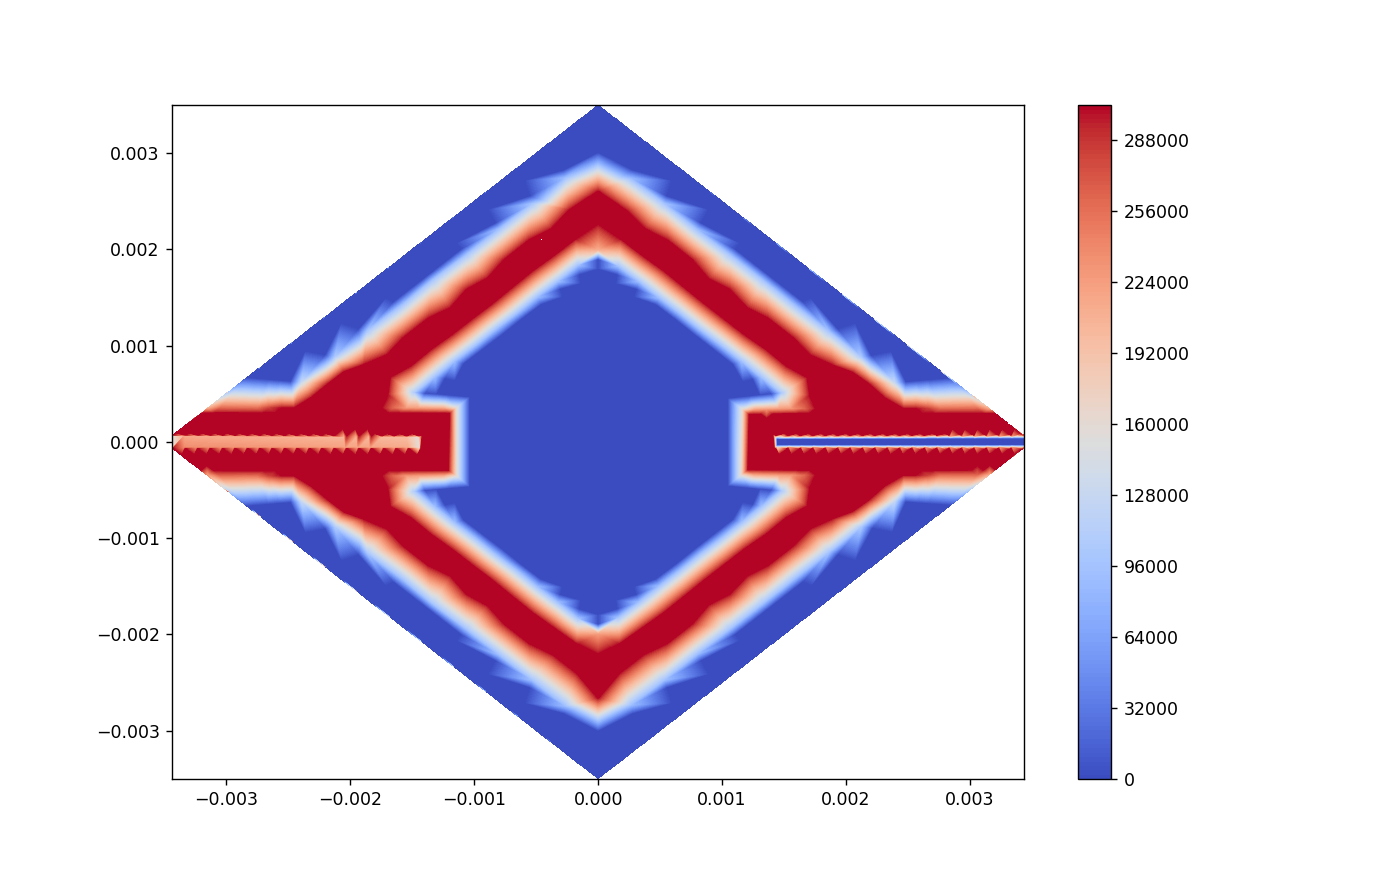

In [127]:
fig = pp.figure(figsize = (11, 7), dpi = 100)
plot = pp.contourf(X, Y, P, 200, cmap=cm.coolwarm)
fig.colorbar(plot)

<IPython.core.display.Javascript object>


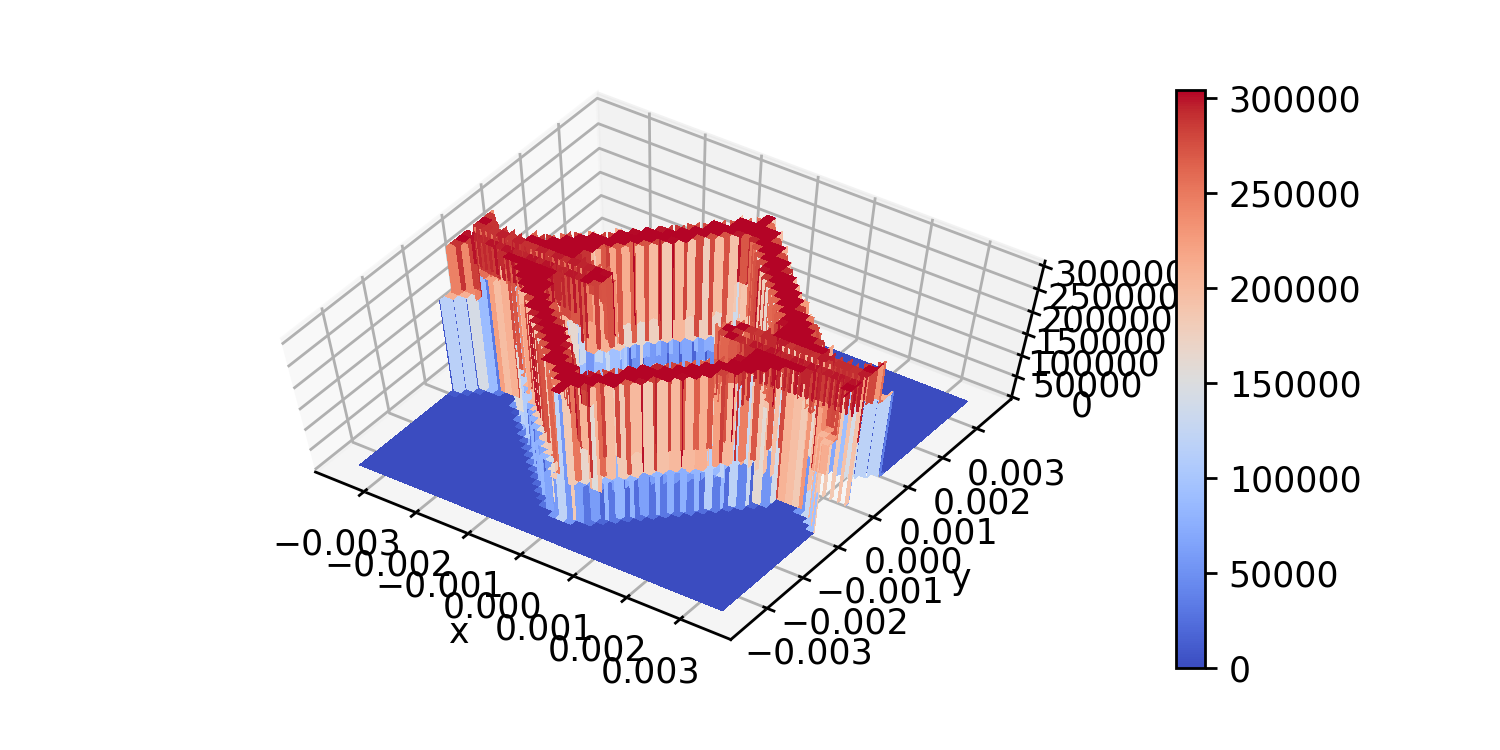

Text(0.5, 0, 'y')

In [132]:
%matplotlib notebook
fig = pp.figure(dpi = 200)
fig.set_size_inches(6, 3)
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(X, Y, P, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf)
pp.xlabel("x")
pp.ylabel("y")
# pp.zlabel("Pressure")

In [108]:
os.chdir("D:/")
pp.savefig("A.png", dpi=200)